In [98]:
import pandas as pd

# cm_features = pd.read_csv('data/cm_features_with_name.csv')
cm_features = pd.read_csv('data/cm_features_v0.4.csv')
cm_features

,month_id,country_id,gleditsch_ward,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,...,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5,country,date,year,ccode,gw_statename
0,121,1,110,0,0,0,0,0,0,0,...,315260.986388,354505.092577,0.093750,1.034032,0.093750,Guyana,1990-01-01,1990,110,Guyana
1,121,2,115,0,0,0,0,0,0,0,...,264606.831667,264606.831667,0.062500,0.062500,0.062500,Suriname,1990-01-01,1990,115,Surinam
2,121,3,52,0,0,0,0,0,0,0,...,3244.939711,3244.939711,0.000000,0.000000,0.000000,Trinidad and Tobago,1990-01-01,1990,52,Trinidad and Tobago
3,121,4,101,0,0,12,0,0,0,0,...,45295.968642,74555.476336,1.062500,1.062500,0.093750,Venezuela,1990-01-01,1990,101,Venezuela
4,121,7,160,0,0,0,0,0,0,0,...,9511.721633,28542.982753,0.874154,0.156250,0.156250,Argentina,1990-01-01,1990,160,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63203,502,242,510,0,0,1,0,0,2,30,...,1536.763246,1761.240449,4.412313,3.889290,2.105145,Tanzania,2021-10-01,2021,510,Tanzania/Tanganyika
63204,502,243,600,0,0,0,2,2,0,5,...,815.035895,815.035895,0.823197,0.049630,0.060734,Morocco,2021-10-01,2021,600,Morocco
63205,502,244,435,0,0,0,0,0,0,0,...,93.401859,2661.952986,1.844790,1.055986,1.065787,Mauritania,2021-10-01,2021,435,Mauritania
63206,502,245,625,3,3,9,2,1,42,82,...,98.007034,926.166474,5.816131,4.897757,4.263890,Sudan,2021-10-01,2021,625,Sudan


In [99]:
from utilities import views_month_id_to_date

# load benchmark model
prediction_year = 2018
model_names = {
    "bootstrap": "bm_cm_bootstrap_expanded_",
    "poisson": "bm_cm_last_historical_poisson_expanded_",
}
benchmark_model = pd.read_parquet(f'Benchmarks/{model_names["poisson"]}{prediction_year}.parquet')
# Group by 'month_id' and 'country_id' and calculate mean and std for each group
agg_funcs = {
    'outcome': ['mean', 'std']  # Assuming 'prediction' is the column to aggregate; adjust if necessary
}
# there is 20 draws per each country per each month. Get the mean of the draws and std for each month
benchmark_model = benchmark_model.groupby(['month_id', 'country_id']).agg(agg_funcs).reset_index()
# Flatten the multi-level columns resulting from aggregation
benchmark_model.columns = ['_'.join(col).strip() if col[1] else col[0] for col in benchmark_model.columns.values]
# Rename columns
benchmark_model.rename(columns={'outcome_mean': 'outcome', 'outcome_std': 'outcome_std'}, inplace=True)

# add date column
benchmark_model['date'] = views_month_id_to_date(benchmark_model['month_id'])
print(benchmark_model['month_id'].unique())
benchmark_model

[457 458 459 460 461 462 463 464 465 466 467 468]


,month_id,country_id,outcome,outcome_std,date
0,457,1,0.000,0.00000,2018-01-01
1,457,2,0.000,0.00000,2018-01-01
2,457,3,0.000,0.00000,2018-01-01
3,457,4,0.000,0.00000,2018-01-01
4,457,5,0.000,0.00000,2018-01-01
...,...,...,...,...,...
2287,468,242,0.000,0.00000,2018-12-01
2288,468,243,0.000,0.00000,2018-12-01
2289,468,244,0.000,0.00000,2018-12-01
2290,468,245,0.000,0.00000,2018-12-01


In [100]:
# load actuals
actuals_model = pd.read_parquet(f'actuals/cm/window=Y{prediction_year}/cm_actuals_{prediction_year}.parquet')
# actuals_model = actuals_model.groupby(['month_id', 'country_id']).mean().reset_index()
actuals_model['date'] = views_month_id_to_date(actuals_model['month_id'])
print(actuals_model['month_id'].unique())
actuals_model

[457 458 459 460 461 462 463 464 465 466 467 468]


,month_id,country_id,ged_sb,date
0,457,1,0.0,2018-01-01
1,457,2,0.0,2018-01-01
2,457,3,0.0,2018-01-01
3,457,4,0.0,2018-01-01
4,457,5,0.0,2018-01-01
...,...,...,...,...
2287,468,242,0.0,2018-12-01
2288,468,243,0.0,2018-12-01
2289,468,244,0.0,2018-12-01
2290,468,245,9.0,2018-12-01


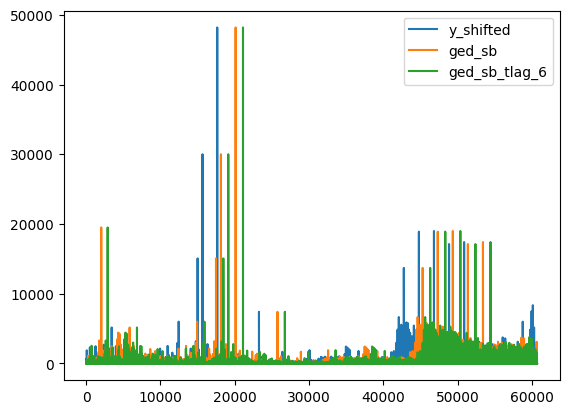

In [101]:
cm_features['y_shifted'] = cm_features.groupby('country_id')['ged_sb'].shift(-15)  # 3 months gap + 12 months prediction
# show na for y_shifted
cm_features[cm_features['y_shifted'].isna()]
# drop na
cm_features = cm_features.dropna()
# plot y_shifted per month
from matplotlib import pyplot as plt

cm_features['y_shifted'].plot()
cm_features['ged_sb'].plot()
cm_features['ged_sb_tlag_6'].plot()
plt.legend()
plt.show()

In [102]:
# drop all ged_sb_tlag_x except for the ged_sb_tlag_6
cm_features = cm_features.drop(columns=['country', 'gleditsch_ward'])
# drop if exists 'year', 'ccode', 'gw_statename'
cm_features = cm_features.drop(columns=['year', 'ccode', 'gw_statename'], errors='ignore')

# cm_features = cm_features.drop(
#     columns=['ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_1', 'ged_sb_tlag_6', ])
# # drop ged_sb, ged_ns, ged_os, acled_sb, acled_sb_ count, acled_os, ged_sb_tsum_24
# cm_features = cm_features.drop(
#     columns=['ged_sb', 'ged_ns', 'ged_os', 'acled_sb', 'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'ged_os_tlag_1'])
# # drop splag_1_decay_ged_sb_5, splag_1_decay_ged_os_5, splag_1_decay_ged_ns_5, decay_ged_sb_5, decay_ged_os_5, decay_ged_sb_500, decay_ged_os_100, decay_ged_ns_5, decay_ged_ns_100, decay_acled_sb_5, decay_acled_os_5, decay_acled_ns_5
# cm_features = cm_features.drop(
#     columns=['splag_1_decay_ged_sb_5', 'splag_1_decay_ged_os_5', 'splag_1_decay_ged_ns_5', 'decay_ged_sb_5',
#              'decay_ged_os_5', 'decay_ged_sb_500', 'decay_ged_os_100', 'decay_ged_ns_5', 'decay_ged_ns_100',
#              'decay_acled_sb_5', 'decay_acled_os_5', 'decay_acled_ns_5', 'decay_ged_sb_100'])



In [103]:
# save first 50 rows of the dataset to a new csv file with column names
# cm_features.head(50).to_csv('data/cm_features_first_50.csv', index=True)
# cm_features.head(10)
# prepare dataset for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cm_features['date'] = pd.to_datetime(cm_features['date'])
cm_features['country_id'] = cm_features['country_id'].astype('category')
cm_features

,month_id,country_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,...,services_efficiency_t48,general_efficiency_t48,water_stress_t48,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5,date,y_shifted
0,121,1,0,0,0,0,0,0,0,752897,...,27.952694,1.380676,3.333333,315260.986388,354505.092577,0.093750,1.034032,0.093750,1990-01-01,0.0
1,121,2,0,0,0,0,0,0,0,408360,...,57.289771,3.922495,2.950609,264606.831667,264606.831667,0.062500,0.062500,0.062500,1990-01-01,0.0
2,121,3,0,0,0,0,0,0,0,1256210,...,35.755839,36.015231,17.956469,3244.939711,3244.939711,0.000000,0.000000,0.000000,1990-01-01,0.0
3,121,4,0,0,12,0,0,0,0,19275292,...,28.946372,26.864392,2.249173,45295.968642,74555.476336,1.062500,1.062500,0.093750,1990-01-01,0.0
4,121,7,0,0,0,0,0,0,0,32165766,...,51.887498,11.043387,7.800305,9511.721633,28542.982753,0.874154,0.156250,0.156250,1990-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60668,487,242,0,0,0,0,0,0,0,59872579,...,39.936434,6.594440,12.963241,1583.434859,1814.729450,4.569363,4.371473,2.248713,2020-07-01,0.0
60669,487,243,0,0,0,0,0,0,0,36304408,...,51.937737,7.966655,50.751212,825.592620,825.592620,0.911026,0.076540,0.093665,2020-07-01,0.0
60670,487,244,0,0,0,0,0,0,0,4383849,...,31.864675,3.627975,13.246217,96.072254,2738.059240,1.944327,1.130247,1.072989,2020-07-01,0.0
60671,487,245,3,107,12,10,1,50,176,43232093,...,52.712908,2.478948,118.656388,100.382863,948.618053,6.108470,4.948411,4.582199,2020-07-01,3.0


In [104]:
from sklearn.preprocessing import OneHotEncoder

# Define the split date


# features_to_exclude = ['id', 'country', 'ged_sb_tlag_6']
# features = [col for col in cm_features.columns if col not in features_to_exclude]

# X_train = train_df[features]
# y_train = train_df['ged_sb_tlag_6']
# X_test = test_df[features]
# y_test = test_df['ged_sb_tlag_6']
# 
# X_train[features]

In [105]:
# One-hot encode 'country_id'
INCLUDE_COUNTRY_ID = True
if INCLUDE_COUNTRY_ID:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoder.fit_transform(cm_features[['country_id']])
    countries_encoded = encoder.transform(cm_features[['country_id']])
    # rename the columns
    countries_encoded = pd.DataFrame(countries_encoded, columns=encoder.get_feature_names_out(['country_id']))
    countries_encoded = countries_encoded.drop(columns='country_id_1')  # drop country_id_1
    # drop na 

    # countries_encoded
    # merge the encoded features with the original dataset
    cm_features = pd.concat([cm_features, countries_encoded], axis=1)
    cm_features = cm_features.dropna()
cm_features

,month_id,country_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,...,country_id_231,country_id_233,country_id_234,country_id_235,country_id_237,country_id_242,country_id_243,country_id_244,country_id_245,country_id_246
0,121.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,752897.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,121.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1256210.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,121.0,4,0.0,0.0,12.0,0.0,0.0,0.0,0.0,19275292.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32165766.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59874,483.0,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10698683.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59875,483.0,63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18513673.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59876,483.0,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5347896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59877,483.0,65,2.0,0.0,0.0,0.0,0.0,0.0,50.0,144406261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [106]:
# Split the dataset into training and test sets
# prediction_year = 2018
# test(final model evaluation): Jan 2018 - Jan 2019
# oct 2016 predicts Jan 2018
# oct 2017 predicts Jan 2019
# thus train set is up until Oct 2016
cut_year = prediction_year - 2  # 2016

features_to_oct = pd.Timestamp(year=cut_year, month=10, day=1)  # 2016-Oct-01

# Splitting the dataset
train_df = cm_features[cm_features['date'] < features_to_oct]  # train is till Sep 2016
# test_df is one year from Oct 2016 to Oct 2017
test_df = cm_features[
    (cm_features['date'] >= features_to_oct) &  # oct 2016 predicts Jan 2018
    (cm_features['date'] < pd.Timestamp(year=prediction_year - 1, month=10, day=1))]  # oct 2017 predicts Jan 2019

In [107]:
# shuffle the training set
# train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [108]:
# save date column for test_df
test_df_date = test_df['date']
train_df_date = train_df['date']
train_df_country_id = train_df['country_id']
test_df_country_id = test_df['country_id']
train_df_month_id = train_df['month_id']
test_df_month_id = test_df['month_id']

test_df = test_df.drop('date', axis=1)
test_df = test_df.drop("country_id", axis=1)

train_df = train_df.drop('date', axis=1)
train_df = train_df.drop("country_id", axis=1)

INCLUDE_MONTH_ID = True
if not INCLUDE_MONTH_ID:
    test_df = test_df.drop('month_id', axis=1)
    train_df = train_df.drop('month_id', axis=1)

print(test_df_month_id.unique())
print("Difference between bechmark and test month_id:")
print(benchmark_model['month_id'].min() - test_df_month_id.min())

train_df.head(200)

[442. 443. 444. 445. 446. 447. 448. 449. 450. 451. 452. 453.]
Difference between bechmark and test month_id:
15.0


,month_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,...,country_id_231,country_id_233,country_id_234,country_id_235,country_id_237,country_id_242,country_id_243,country_id_244,country_id_245,country_id_246
0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,752897.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408360.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1256210.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,121.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,19275292.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32165766.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10089498.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,122.0,6.0,573.0,0.0,0.0,0.0,0.0,788.0,3525502.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,122.0,22.0,0.0,0.0,0.0,0.0,0.0,476.0,53305234.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7619567.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
target = 'y_shifted'
X_train = train_df.drop(target, axis=1)
y_train = train_df[target]
X_test = test_df.drop(target, axis=1)
y_test = test_df[target]

In [110]:
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
52894     0.0
52895     0.0
52896     0.0
52897     4.0
52898    62.0
Name: y_shifted, Length: 52105, dtype: float64

In [111]:
# assert month_id, country_id, date are not in the features
# assert 'month_id' not in X_train.columns
print('month_id' in X_train.columns)
X_test

True


,month_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,...,country_id_231,country_id_233,country_id_234,country_id_235,country_id_237,country_id_242,country_id_243,country_id_244,country_id_245,country_id_246
52899,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755031.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52900,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575475.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52901,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1460177.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52902,442.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,30529716.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52903,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43131966.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54922,453.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,54401802.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54923,453.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35107264.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54924,453.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4051890.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54925,453.0,19.0,0.0,9.0,22.0,6.0,29.0,1551.0,39377169.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
import xgboost as xgb

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test, label=y_test)

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Specify parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
}

# Train the model
num_round = 40
bst = xgb.train(params, dtrain, num_round)

# Make predictions
xgb_train_predictions = bst.predict(dtrain)
xgb_predictions = bst.predict(dtest)
# Discard all negative predictions and set them to 0. This is because the target variable is non-negative
# and following the ViEWS technical report they use GAM that converts negative predictions to 0 and then almost linear
xgb_train_predictions = [max(0, pred) for pred in xgb_train_predictions]
xgb_predictions = [max(0, pred) for pred in xgb_predictions]

In [113]:
# map predictions to months based on the test_df
test_df['predictions'] = xgb_predictions
train_df['predictions'] = xgb_train_predictions

# add date column back to test_df and add to each date shift of 15 months
test_df['date'] = test_df_date + pd.DateOffset(months=15)
train_df['date'] = train_df_date
test_df['country_id'] = test_df_country_id
train_df['country_id'] = train_df_country_id
test_df['month_id'] = test_df_month_id
train_df['month_id'] = train_df_month_id

test_df

,month_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,...,country_id_235,country_id_237,country_id_242,country_id_243,country_id_244,country_id_245,country_id_246,predictions,date,country_id
52899,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,755031.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121873,2018-01-01,1
52900,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575475.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121873,2018-01-01,2
52901,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1460177.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121873,2018-01-01,3
52902,442.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,30529716.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121873,2018-01-01,4
52903,442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43131966.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121873,2018-01-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54922,453.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,54401802.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121873,2018-12-01,242
54923,453.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35107264.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121873,2018-12-01,243
54924,453.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4051890.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.355735,2018-12-01,244
54925,453.0,19.0,0.0,9.0,22.0,6.0,29.0,1551.0,39377169.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.781418,2018-12-01,245


In [114]:
# Calculate RMSE
train_rmse = sqrt(mean_squared_error(y_train, xgb_train_predictions))
rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
# actuals_rmse = sqrt(mean_squared_error(actuals_model['ged_sb'], predictions))
# benchmark_rmse = sqrt(mean_squared_error(y_test, benchmark_model['outcome']))
actuals_bench_rmse = sqrt(mean_squared_error(actuals_model['ged_sb'], benchmark_model['outcome']))

print(f"Include country_id: {INCLUDE_COUNTRY_ID}")
print(f"Include month_id: {INCLUDE_MONTH_ID}")

print(f"XGB [train predictions] RMSE: {train_rmse}")
print(f"XGB [test predictions]  RMSE YTEST VS PREDICTIONS: {rmse}")

# print(f"RMSE YTEST VS ACTUALS: {actuals_rmse}")
# print(f"RMSE YTEST VS BENCHMARK: {benchmark_rmse}")
print(f"\nBenchmark: RMSE ACTUALS VS BENCHMARK: {actuals_bench_rmse}")

Include country_id: True
Include month_id: True
XGB [train predictions] RMSE: 124.47144432091976
XGB [test predictions]  RMSE YTEST VS PREDICTIONS: 147.86182904643107

Benchmark: RMSE ACTUALS VS BENCHMARK: 145.02118862282583


In [115]:
DO_IMPORTANCE = False
# print all feature importance sorted
feature_importance = bst.get_fscore()
feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print(feature_importance)

if DO_IMPORTANCE:
    from xgboost import plot_importance

    # plot
    plot_importance(bst, max_num_features=10)
    plt.show()

    import shap

    explainer = shap.TreeExplainer(bst)
    # dtrain = xgb.DMatrix(X_train, label=y_train)
    dtrain.feature_names = X_train.columns.tolist()
    explanation = explainer(dtrain)
    explanation = shap.Explanation(
        values=explanation.values,
        base_values=explanation.base_values,
        data=explanation.data,
        feature_names=X_train.columns.tolist()
    )
    shap.plots.beeswarm(explanation)



[('month_id', 208.0), ('ged_sb', 111.0), ('ged_os_tlag_1', 73.0), ('ged_sb_tsum_24', 63.0), ('ged_sb_tlag_2', 55.0), ('acled_sb', 44.0), ('ged_sb_tlag_3', 44.0), ('ged_os', 37.0), ('ged_sb_tlag_1', 34.0), ('country_id_87', 34.0), ('splag_1_decay_ged_os_5', 33.0), ('ged_ns', 31.0), ('ged_sb_tlag_6', 28.0), ('decay_ged_sb_100', 28.0), ('wdi_sm_pop_totl_zs', 25.0), ('wdi_sp_pop_totl', 21.0), ('ged_sb_tlag_5', 19.0), ('decay_ged_ns_100', 18.0), ('acled_os', 17.0), ('wdi_sm_pop_refg_or', 17.0), ('wdi_sp_dyn_imrt_in', 17.0), ('decay_acled_sb_5', 17.0), ('ged_sb_tlag_4', 16.0), ('splag_1_decay_ged_sb_5', 16.0), ('country_id_131', 16.0), ('wdi_sl_tlf_totl_fe_zs', 15.0), ('decay_ged_os_100', 13.0), ('decay_ged_ns_5', 13.0), ('splag_1_decay_ged_ns_5', 13.0), ('vdem_v2clrgunev', 11.0), ('country_id_64', 11.0), ('country_id_165', 10.0), ('wdi_sp_dyn_le00_in', 9.0), ('vdem_v2xcl_dmove', 9.0), ('decay_ged_sb_500', 9.0), ('decay_acled_os_5', 8.0), ('wdi_sh_sta_stnt_zs', 7.0), ('vdem_v2x_ex_party', 7.

Unique months: [442. 443. 444. 445. 446. 447. 448. 449. 450. 451. 452. 453.]


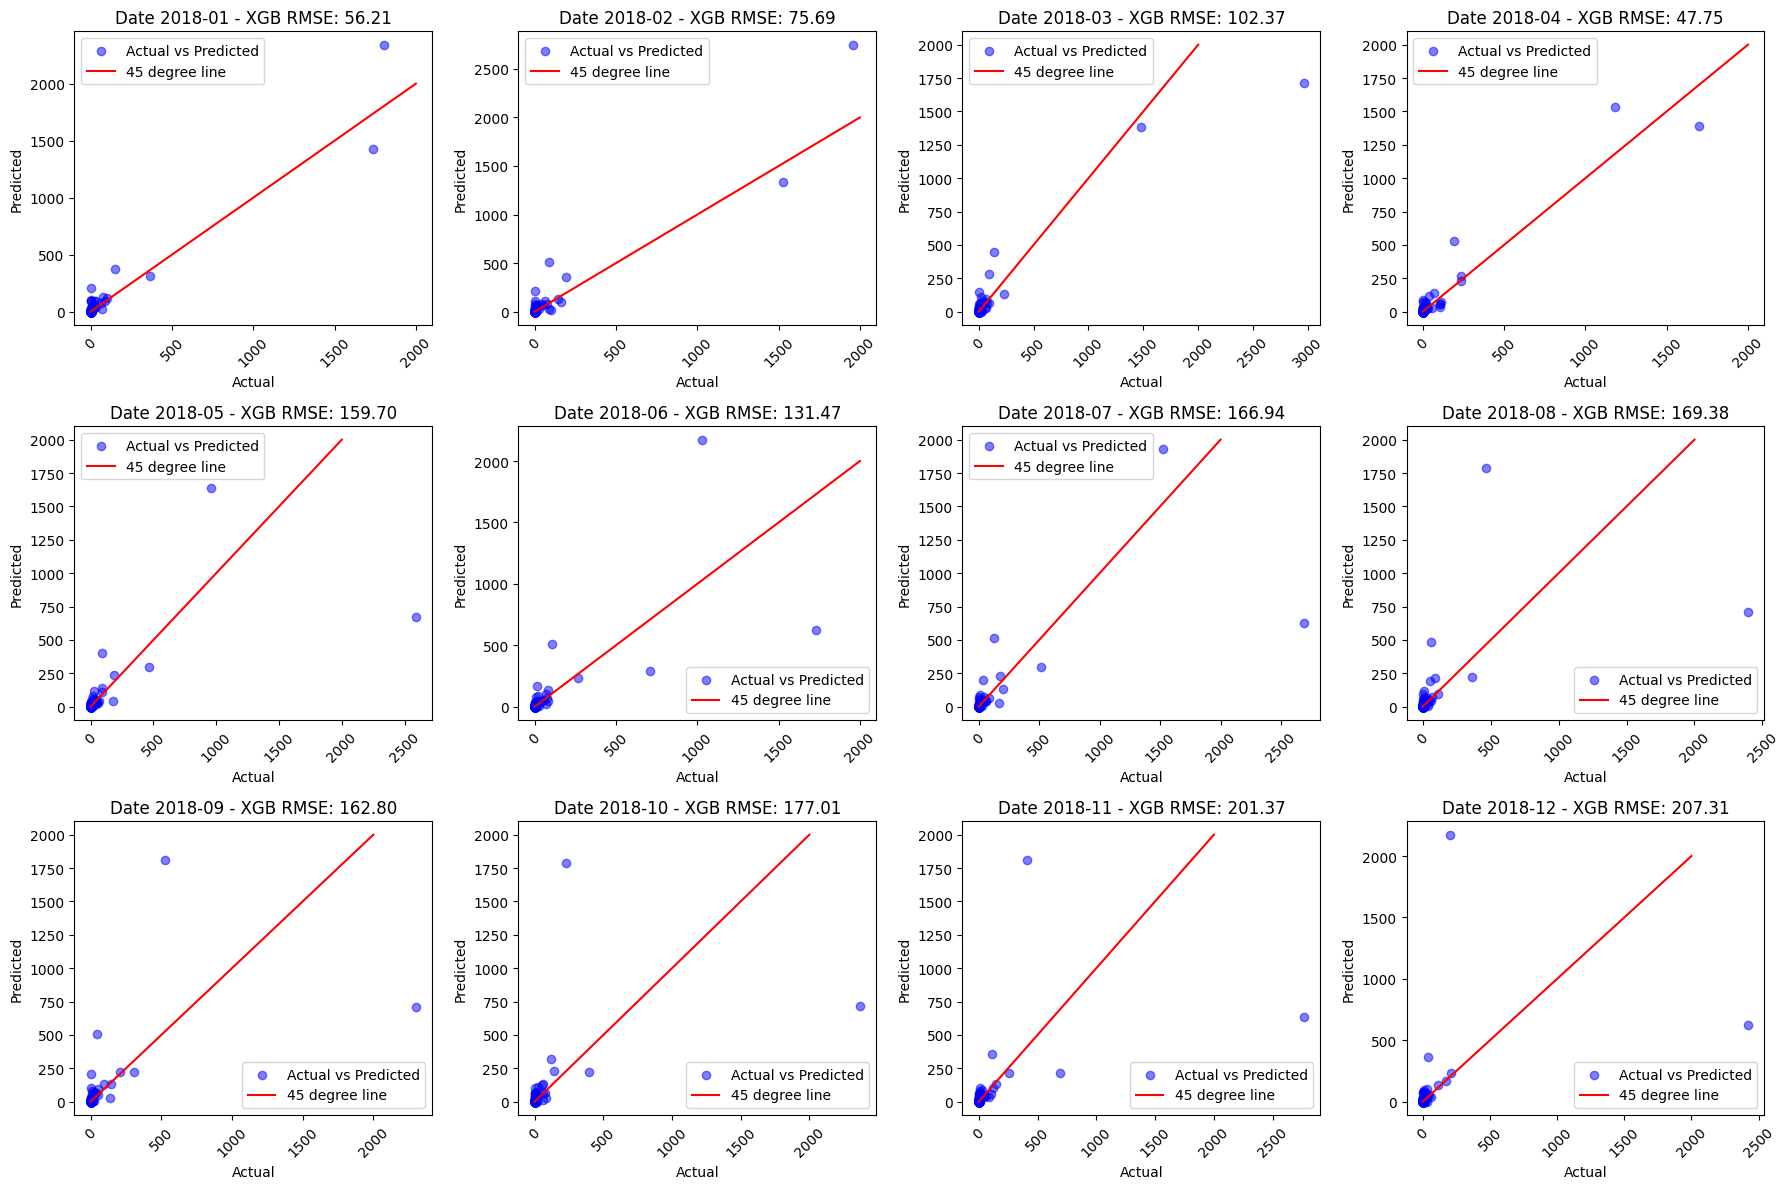

In [116]:

import matplotlib.pyplot as plt

# Assuming test_df is your DataFrame, and 'target' and 'predictions' are columns in it
unique_months = test_df['month_id'].unique()
n_months = len(unique_months)
print("Unique months:", unique_months)

# Calculate the grid size for the subplot (simple square root approximation for a square grid)
grid_size_x = int(n_months ** 0.5) + (1 if n_months % int(n_months ** 0.5) else 0)
grid_size_y = grid_size_x + 1

# print(f'Grid size: {grid_size}')
# Set overall figure size
plt.figure(figsize=(grid_size_x * 6, grid_size_y * 3))  # Adjust the size factors (6, 4) based on your preference

for index, month_id in enumerate(unique_months, start=1):
    this_month = test_df[test_df['month_id'] == month_id]
    mean_sq_error = sqrt(mean_squared_error(this_month[target], this_month['predictions']))
    current_date = this_month["date"].iloc[0]
    target_month = this_month[target]
    predictions_month = this_month['predictions']

    # Create subplot for current month
    plt.subplot(grid_size_x, grid_size_y, index)
    plt.scatter(target_month, predictions_month, color='blue', label='Actual vs Predicted', alpha=0.5)

    # print current_date in YY/MM format
    print_date = current_date.strftime('%Y-%m')
    plt.title(f'Date {print_date} - XGB RMSE: {mean_sq_error:.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.plot([0, 2000], [0, 2000], color='red', label='45 degree line')
    plt.legend()
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [117]:
DO_PLOTS = False
if DO_PLOTS:
    import pandas as pd
    import matplotlib.pyplot as plt
    from dateutil.relativedelta import relativedelta

    # Load data
    country_list = pd.read_csv('data/country_list.csv')
    country_ids = test_df['country_id'].unique().tolist()

    # Settings
    num_plots_per_figure = 4

    plt.figure(figsize=(15, 10))  # New figure
    plots_added = 0
    # Continue looping until all countries have been considered
    max_date_train = pd.to_datetime(train_df['date'].max())
    min_date_test = pd.to_datetime(test_df['date'].min())
    expected_min_date_test = max_date_train + relativedelta(months=15 + 1)  # 15 is window size + 1 is from Sep to Oct
    print(f"Max date in training set: {max_date_train}")
    print(f"Min date in test set: {min_date_test}")
    print(f"Expected min date in test set: {expected_min_date_test}")
    # assert the different is exactly 15 months
    assert min_date_test == expected_min_date_test

    for index, country_id in enumerate(country_ids):

        this_country_test = test_df[test_df['country_id'] == country_id]
        this_country_train = train_df[train_df['country_id'] == country_id]
        # get last 24 months for this_country_train
        this_country_train = this_country_train.tail(24)

        country_name = country_list[country_list['country_id'] == country_id]['name'].values[0]

        # Check if country should be skipped due to no data
        if this_country_test[target].sum() == 0:
            print(f"Skipping {country_name} as all actual are 0")
            continue

        # Prepare the subplot for non-skipped countries
        plt.subplot(2, 2, plots_added + 1)

        # Plotting data
        plt.plot(this_country_train['date'], this_country_train[target], label=f'{country_name} Train', color='gray',
                 linestyle='-', marker='')
        plt.plot(this_country_test['date'], this_country_test[target], label=f'{country_name} Actual', color='black',
                 linestyle='-', marker='')
        plt.plot(this_country_test['date'], this_country_test['predictions'], label=f'{country_name} Predicted XGB',
                 color='red', linestyle='-', marker='')

        # plt.plot([max_date_train, min_date_test], [-0, -0], color='gray', linestyle='-', marker='', alpha=0.5,
        #          label='15 months prediction window')

        # Benchmark plotting
        benchmark_country = benchmark_model[benchmark_model['country_id'] == country_id]
        plt.plot(benchmark_country['date'], benchmark_country['outcome'], label=f'{country_name} Benchmark',
                 color='green', linestyle='--', marker='')
        plt.fill_between(benchmark_country['date'], benchmark_country['outcome'] - benchmark_country['outcome_std'],
                         benchmark_country['outcome'] + benchmark_country['outcome_std'], color='green', alpha=0.2)

        # Adding title and labels
        plt.title(f"Actual vs Predicted Values for {country_name}")
        plt.xlabel("Date")
        # turn dates 90 degrees
        plt.xticks(rotation=45)
        # make ticks more readable
        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m"))
        # add vertical lines for the training and testing split
        plt.axvline(x=min_date_test, color='gray', linestyle='--', label='15 months prediction window')
        plt.axvline(x=max_date_train, color='gray', linestyle='--')
        plt.ylabel("Total number of battle-related deaths from state-based conflict")
        plt.legend()
        # add light grid
        plt.grid(alpha=0.3)

        # Increment counters
        plots_added += 1

        if plots_added % num_plots_per_figure == 0 or index == len(country_ids) - 1:
            # Adjust layout and display the figure
            plt.tight_layout()
            plt.show()
            plt.figure(figsize=(15, 10))  # New figure
            plots_added = 0

    plt.show()

In [118]:
import plotly.graph_objects as go

PLOT_ONE_FIGURE = False
if PLOT_ONE_FIGURE:
    # Assuming country_list, test_df, and train_df are already loaded
    # Creating one figure for all countries
    fig = go.Figure()

    country_ids = test_df['country_id'].unique().tolist()

    for country_id in country_ids:
        # Data for this country
        this_country_test = test_df[test_df['country_id'] == country_id]
        this_country_train = train_df[train_df['country_id'] == country_id]
        country_name = country_list[country_list['country_id'] == country_id]['name'].values[0]

        # Add traces for Train Actual
        fig.add_trace(
            go.Scatter(x=this_country_train['date'], y=this_country_train[target], name=f'{country_name} Train',
                       mode='lines', line=dict(color='gray', width=1))
        )

        # Add traces for Test Actual
        fig.add_trace(
            go.Scatter(x=this_country_test['date'], y=this_country_test[target], name=f'{country_name} Test Actual',
                       mode='lines', line=dict(color='blue', width=1))
        )

        # Add traces for Predicted
        fig.add_trace(
            go.Scatter(x=this_country_test['date'], y=this_country_test['predictions'],
                       name=f'{country_name} Predicted', mode='lines', line=dict(color='red', dash='dot', width=1))
        )

    # Add figure title and adjust layout
    fig.update_layout(
        title_text="Actual vs Predicted Values Across Countries",
        xaxis_title="Date",
        yaxis_title="GED_SB Value",
        legend_title="Legend",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    # Show plot
    fig.show()

In [119]:

# len(set(benchmark_model['country_id'].unique()) - set(test_df['country_id'].unique()))
print(benchmark_model['month_id'].unique())
print(test_df['month_id'].unique())
print("Adjusted month_id for predictions:", test_df['month_id'].unique() + 15)
set(benchmark_model['month_id'].unique()) == set(test_df['month_id'].unique() + 15)

[457 458 459 460 461 462 463 464 465 466 467 468]
[442. 443. 444. 445. 446. 447. 448. 449. 450. 451. 452. 453.]
Adjusted month_id for predictions: [457. 458. 459. 460. 461. 462. 463. 464. 465. 466. 467. 468.]


True

In [120]:
import os

missing_countries = set(benchmark_model['country_id'].unique()) - set(test_df['country_id'].unique())

# save predictions to a csv file
# for each month for each country create 20 draws of the prediction named outcome
# the structure of the file should be month_id, country_id, draw, outcome
new_predictions_list = []
all_countries = set(test_df['country_id'].unique()).union(missing_countries)
for month_id in test_df['month_id'].unique():
    for country_id in all_countries:
        this_country_month = test_df[(test_df['month_id'] == month_id) & (test_df['country_id'] == country_id)]

        if country_id in missing_countries:
            outcomes = [0] * 100
        else:
            outcomes = [this_country_month['predictions'].values[0]] * 100

        new_predictions_list.extend([{
            'month_id': month_id + 15,  # adjust for prediction window
            'country_id': country_id,
            'draw': draw,
            'outcome': outcome
        } for draw, outcome in enumerate(outcomes, start=1)])

# set month_id, country_id, draw as int and outcome as float

new_predictions = pd.DataFrame(new_predictions_list)
new_predictions['month_id'] = new_predictions['month_id'].astype(int)
new_predictions['country_id'] = new_predictions['country_id'].astype(int)
new_predictions['draw'] = new_predictions['draw'].astype(int)
new_predictions['outcome'] = new_predictions['outcome'].astype(int)
# set index to month_id, country_id, draw
new_predictions.set_index(['month_id', 'country_id', 'draw'], inplace=True)
# create folder if it does not exist recursively
folder = f"submission/xg_boost/cm/window=Y{prediction_year}"
os.makedirs(folder, exist_ok=True)
new_predictions.to_parquet(folder + f'/xg_boost_{prediction_year}.parquet')

print("Saved!")
new_predictions

Saved!


outcome
month_id country_id draw         
457      1          1           0
                    2           0
                    3           0
                    4           0
                    5           0
...                           ...
468      246        96         60
                    97         60
                    98         60
                    99         60
                    100        60

[229200 rows x 1 columns]